In [1]:
from load_config import load_config
from utils import model_from_config, load_newest
from plotting.plotting import compare, make_visual
from evaluator import Evaluator
from datasets.preprocessor import Preprocessor_2p5D
import torch

device='cuda'

In [2]:
config = load_config()
checkpoints_path = config['checkpoint_dir']

In [3]:
net = model_from_config(config).to(device)

In [4]:
net = load_newest(checkpoints_path, net, device)

In [5]:
evaluator = Evaluator(config, net, device=device)

In [6]:
pre = Preprocessor_2p5D(config)

In [14]:
dp = pre.process(0)

In [15]:
vol, seg = dp.full_vol, dp.full_seg

In [16]:
%matplotlib ipympl

In [17]:
pred = evaluator.evaluate(vol)

batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([7, 3, 512, 512])


In [18]:
pred.shape

torch.Size([75, 512, 512])

In [19]:
seg.shape

torch.Size([75, 512, 512])

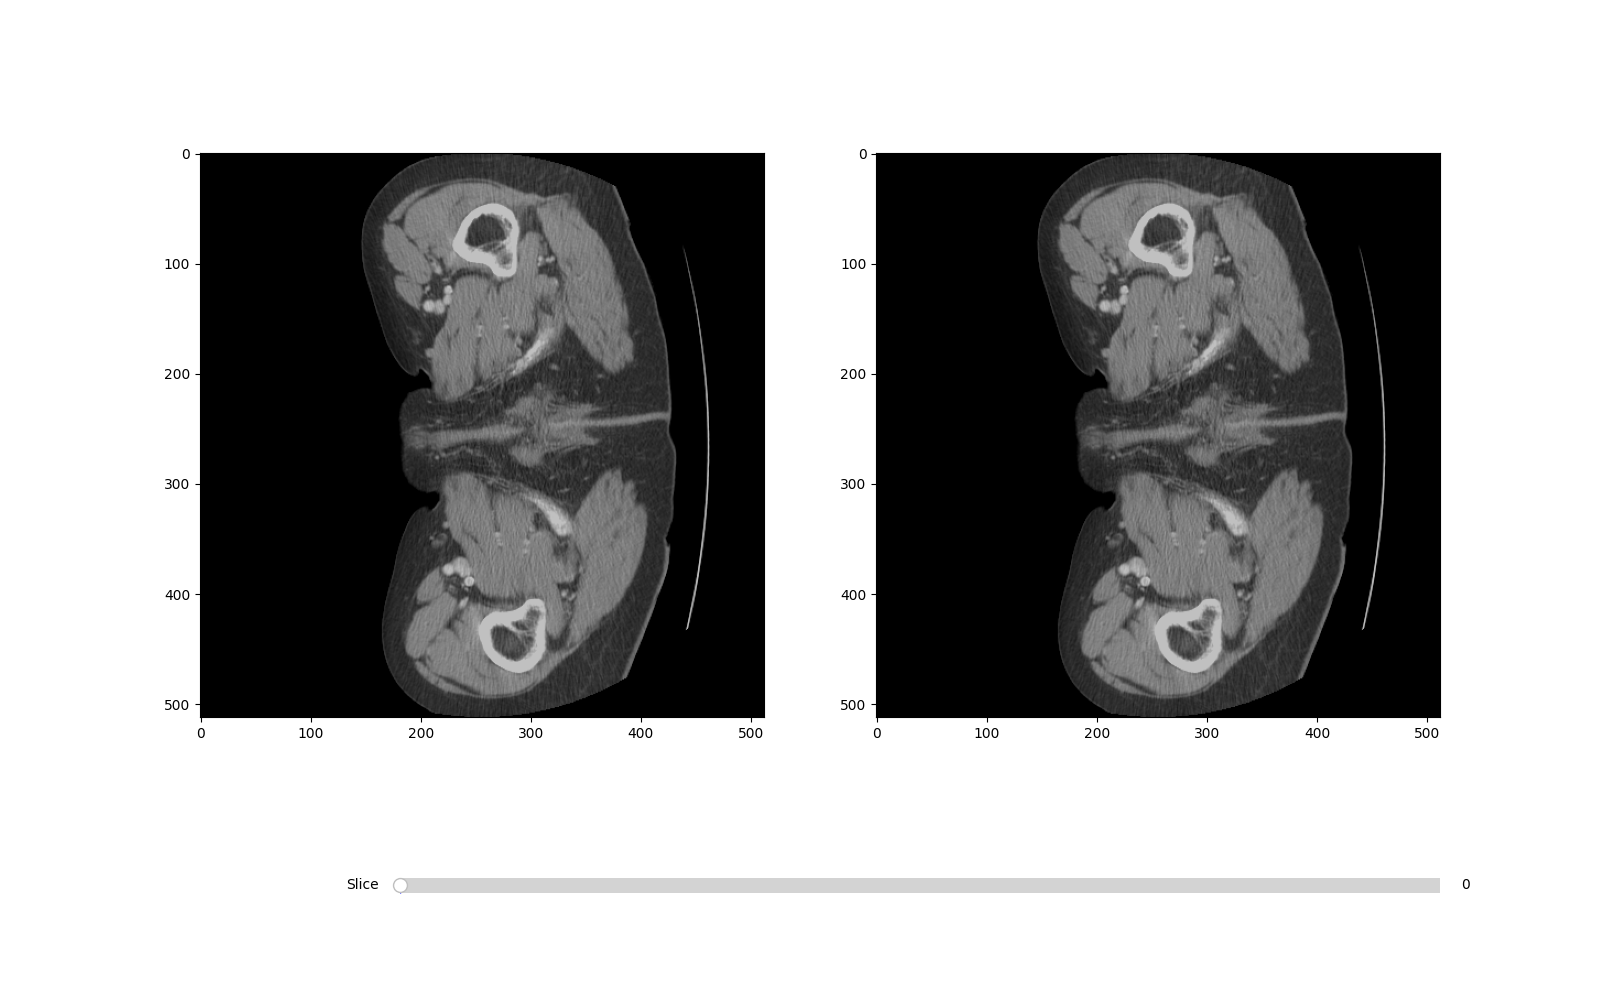

In [20]:
compare(vol, seg, pred)